## Exploration du jeu de données : Projet FR - VEOLIA
---


On commence tout d'abord par importer les données provenant du fichier excel transmis le XX

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [2]:
df = pd.read_excel("telecom_paris_dataset.xlsx")

**Type de données**

In [3]:
df_backup = df.copy

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180680 entries, 0 to 180679
Data columns (total 7 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   building_id                  180680 non-null  object        
 1   equipment_type               180680 non-null  object        
 2   equipment_type_and_sub_type  180680 non-null  object        
 3   equipment_id                 180680 non-null  object        
 4   timestamp_local              180680 non-null  datetime64[ns]
 5   energy_input_in_mwh          180680 non-null  float64       
 6   energy_output_in_mwh         180680 non-null  float64       
dtypes: datetime64[ns](1), float64(2), object(4)
memory usage: 9.6+ MB


In [5]:
cols = df.columns
cols

Index(['building_id', 'equipment_type', 'equipment_type_and_sub_type',
       'equipment_id', 'timestamp_local', 'energy_input_in_mwh',
       'energy_output_in_mwh'],
      dtype='object')

In [6]:
equipment_list = df["equipment_id"].unique()
df[cols[0]].unique()

array(['it003515r', 'it019820w', 'it049959b', 'it0'], dtype=object)

In [7]:
cols = df.columns
pd.DataFrame({'Colonne':cols,'Nombre de valeurs uniques': [df[col].nunique() for col in cols]})     

,Colonne,Nombre de valeurs uniques
0,building_id,4
1,equipment_type,1
2,equipment_type_and_sub_type,1
3,equipment_id,16
4,timestamp_local,15002
5,energy_input_in_mwh,7988
6,energy_output_in_mwh,6006


In [8]:
for id_building in range(4):
    buildings_data = df.loc[df[cols[0]] == df[cols[0]].unique()[id_building]]
    cols_b = buildings_data.columns
    df_temp = pd.DataFrame({'Colonne':cols_b,'Nombre de valeurs uniques': [buildings_data[col].nunique() for col in cols_b]})
    df_temp.index.name = 'Building id : '+df[cols[0]].unique()[id_building]
    display(df_temp)

,Colonne,Nombre de valeurs uniques
Building id : it003515r,,
0,building_id,1
1,equipment_type,1
2,equipment_type_and_sub_type,1
3,equipment_id,3
4,timestamp_local,14051
5,energy_input_in_mwh,1
6,energy_output_in_mwh,131


,Colonne,Nombre de valeurs uniques
Building id : it019820w,,
0,building_id,1
1,equipment_type,1
2,equipment_type_and_sub_type,1
3,equipment_id,5
4,timestamp_local,8682
5,energy_input_in_mwh,1786
6,energy_output_in_mwh,1199


,Colonne,Nombre de valeurs uniques
Building id : it049959b,,
0,building_id,1
1,equipment_type,1
2,equipment_type_and_sub_type,1
3,equipment_id,5
4,timestamp_local,14596
5,energy_input_in_mwh,6450
6,energy_output_in_mwh,4130


,Colonne,Nombre de valeurs uniques
Building id : it0,,
0,building_id,1
1,equipment_type,1
2,equipment_type_and_sub_type,1
3,equipment_id,3
4,timestamp_local,7379
5,energy_input_in_mwh,399
6,energy_output_in_mwh,2112


In [9]:
df_building1 = df.loc[df[cols[0]] == df[cols[0]][0]]
df_building1

,building_id,equipment_type,equipment_type_and_sub_type,equipment_id,timestamp_local,energy_input_in_mwh,energy_output_in_mwh
0,it003515r,chiller,chiller_compression,eq_it003515r_chiller_compression_01,2022-03-24 08:00:00,0.0,0.0
1,it003515r,chiller,chiller_compression,eq_it003515r_chiller_compression_01,2022-03-24 15:00:00,0.0,0.0
2,it003515r,chiller,chiller_compression,eq_it003515r_chiller_compression_01,2022-03-24 11:00:00,0.0,0.0
3,it003515r,chiller,chiller_compression,eq_it003515r_chiller_compression_01,2022-03-24 07:00:00,0.0,0.0
4,it003515r,chiller,chiller_compression,eq_it003515r_chiller_compression_01,2022-03-24 12:00:00,0.0,0.0
...,...,...,...,...,...,...,...
180475,it003515r,chiller,chiller_compression,eq_it003515r_chiller_compression_03,2022-05-22 12:00:00,0.0,1.1
180476,it003515r,chiller,chiller_compression,eq_it003515r_chiller_compression_03,2022-05-22 06:00:00,0.0,0.9
180477,it003515r,chiller,chiller_compression,eq_it003515r_chiller_compression_03,2022-05-22 17:00:00,0.0,1.2
180478,it003515r,chiller,chiller_compression,eq_it003515r_chiller_compression_03,2022-05-22 18:00:00,0.0,1.2


In [10]:
cols_b1 = df_building1.columns
pd.DataFrame({'Colonne':cols_b1,'Nombre de valeurs uniques': [df_building1[col].nunique() for col in cols_b1]})     

,Colonne,Nombre de valeurs uniques
0,building_id,1
1,equipment_type,1
2,equipment_type_and_sub_type,1
3,equipment_id,3
4,timestamp_local,14051
5,energy_input_in_mwh,1
6,energy_output_in_mwh,131


In [11]:
df_building2 = df.loc[df[cols[0]] == df[cols[0]].unique()[1]]
df_building3 = df.loc[df[cols[0]] == df[cols[0]].unique()[2]]
df_building4 = df.loc[df[cols[0]] == df[cols[0]].unique()[3]]
cols_b2 = df_building2.columns
cols_b3 = df_building3.columns
cols_b4 = df_building4.columns

pd.DataFrame({'Colonne':cols_b2,
              'Valeurs uniques ('+df_building1.building_id.iloc[0]+')': [df_building1[col].nunique() for col in cols_b1],
              'Valeurs uniques ('+df_building2.building_id.iloc[0]+')': [df_building2[col].nunique() for col in cols_b2],
              'Valeurs uniques ('+df_building3.building_id.iloc[0]+')': [df_building3[col].nunique() for col in cols_b3],
              'Valeurs uniques ('+df_building4.building_id.iloc[0]+')': [df_building4[col].nunique() for col in cols_b4]
              })

# Faire une itération pour montrer le nombre de

,Colonne,Valeurs uniques (it003515r),Valeurs uniques (it019820w),Valeurs uniques (it049959b),Valeurs uniques (it0)
0,building_id,1,1,1,1
1,equipment_type,1,1,1,1
2,equipment_type_and_sub_type,1,1,1,1
3,equipment_id,3,5,5,3
4,timestamp_local,14051,8682,14596,7379
5,energy_input_in_mwh,1,1786,6450,399
6,energy_output_in_mwh,131,1199,4130,2112


In [12]:
df_building3[cols[3]].unique()

array(['eq_it049959b_chiller_compression_01',
       'eq_it049959b_chiller_compression_02',
       'eq_it049959b_chiller_compression_03',
       'eq_it049959b_chiller_compression_05',
       'eq_it049959b_chiller_compression_04'], dtype=object)

In [13]:
b3_equipment = df_building3[cols[3]].unique()
b3_equipment[0]

'eq_it049959b_chiller_compression_01'

In [14]:
df_building3[cols[3]].value_counts()

eq_it049959b_chiller_compression_01    14596
eq_it049959b_chiller_compression_02    14596
eq_it049959b_chiller_compression_03    14596
eq_it049959b_chiller_compression_05    14596
eq_it049959b_chiller_compression_04    14596
Name: equipment_id, dtype: int64

In [15]:
(df_building3['equipment_id'] == b3_equipment[0]).value_counts()

False    58384
True     14596
Name: equipment_id, dtype: int64

In [16]:
df_b3_eq_01 = df_building3.loc[df_building3['equipment_id'] == b3_equipment[0]]
df_b3_eq_01

,building_id,equipment_type,equipment_type_and_sub_type,equipment_id,timestamp_local,energy_input_in_mwh,energy_output_in_mwh
177,it049959b,chiller,chiller_compression,eq_it049959b_chiller_compression_01,2022-03-24 02:00:00,0.000000,0.00
178,it049959b,chiller,chiller_compression,eq_it049959b_chiller_compression_01,2022-03-24 14:00:00,0.000000,0.00
179,it049959b,chiller,chiller_compression,eq_it049959b_chiller_compression_01,2022-03-24 23:00:00,0.000000,0.00
180,it049959b,chiller,chiller_compression,eq_it049959b_chiller_compression_01,2022-03-24 01:00:00,0.000000,0.00
181,it049959b,chiller,chiller_compression,eq_it049959b_chiller_compression_01,2022-03-24 18:00:00,0.000000,0.00
...,...,...,...,...,...,...,...
180579,it049959b,chiller,chiller_compression,eq_it049959b_chiller_compression_01,2022-05-22 14:00:00,0.012313,0.28
180580,it049959b,chiller,chiller_compression,eq_it049959b_chiller_compression_01,2022-05-22 02:00:00,0.009375,0.23
180581,it049959b,chiller,chiller_compression,eq_it049959b_chiller_compression_01,2022-05-22 19:00:00,0.011188,0.28
180582,it049959b,chiller,chiller_compression,eq_it049959b_chiller_compression_01,2022-05-22 08:00:00,0.002312,0.07


In [17]:
# df_backup = df.copy
# df = df_backup.copy
df_building = df.loc[df[cols[0]] == df[cols[0]][0]]
df_sample = df_building3.loc[df_building3['equipment_id'] == b3_equipment[1]].copy()
df_sample["new_time_stamp"] = df_sample['timestamp_local'].apply(lambda x : x.strftime("%Y-%m-%d")) # x.strftime("%Y-%m-%d")
df_sample = df_sample.groupby(["new_time_stamp"]).mean()
display(df_sample)

C:\Users\dhbat\AppData\Local\Temp\ipykernel_13080\4241969414.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_sample = df_sample.groupby(["new_time_stamp"]).mean()


,energy_input_in_mwh,energy_output_in_mwh
new_time_stamp,,
2021-01-01,0.000174,0.000000
2021-01-02,0.000174,0.000000
2021-01-04,0.000869,0.000000
2021-01-05,0.000172,0.000000
2021-01-06,0.000174,0.000000
...,...,...
2022-09-15,0.149188,0.886667
2022-09-16,0.119547,0.775458
2022-09-17,0.063885,0.369542


In [18]:
df_temp = df_sample.copy()
df_temp = df_temp.reset_index()
fig = px.line(df_temp, x="new_time_stamp", y=["energy_input_in_mwh","energy_output_in_mwh"],
              title="Building id : "+"1"+" || "+"Equipment id : "+b3_equipment[1])
fig.show()

In [19]:
df[cols[0]].unique()[1]

'it019820w'

In [20]:
df = df_backup()
id_building = 1
df_building = df.loc[df[cols[0]] == df[cols[0]].unique()[id_building]]

print('Building id : '+df[cols[0]].unique()[id_building])

cols_b = df_building.columns
df_resume = pd.DataFrame({'Colonne':cols_b,'Nombre de valeurs uniques': [df_building[col].nunique() for col in cols_b]})
df_resume.index.name = 'Building id : '+df[cols[0]].unique()[id_building]
display(df_resume)

b_equipments = df_building['equipment_id'].unique()
for b_equipment in b_equipments:
    df_sample = df_building.loc[df_building['equipment_id'] == b_equipment].copy()
    df_sample["new_time_stamp"] = df_sample['timestamp_local'].apply(lambda x : x.strftime("%Y-%m-%d")) # x.strftime("%Y-%m-%d")
    df_sample = df_sample.groupby(["new_time_stamp"]).mean()
    # display(df_sample)

    df_temp = df_sample.copy()
    df_temp = df_temp.reset_index()
    fig = px.line(df_temp, x="new_time_stamp", y=["energy_input_in_mwh","energy_output_in_mwh"],
                  title="Building id : "+df[cols[0]].unique()[id_building]+" || "+"Equipment id : "+b_equipment)
    # fig.show()

Building id : it019820w


,Colonne,Nombre de valeurs uniques
Building id : it019820w,,
0,building_id,1
1,equipment_type,1
2,equipment_type_and_sub_type,1
3,equipment_id,5
4,timestamp_local,8682
5,energy_input_in_mwh,1786
6,energy_output_in_mwh,1199


C:\Users\dhbat\AppData\Local\Temp\ipykernel_13080\3709057463.py:16: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.

C:\Users\dhbat\AppData\Local\Temp\ipykernel_13080\3709057463.py:16: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.

C:\Users\dhbat\AppData\Local\Temp\ipykernel_13080\3709057463.py:16: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.

C:\Users\dhbat\AppData\Local\Temp\ipykernel_13080\3709057463.py:16: FutureWarni

In [21]:
df["building_id"].unique()

array(['it003515r', 'it019820w', 'it049959b', 'it0'], dtype=object)

In [22]:
df["equipment_id"].unique()

array(['eq_it003515r_chiller_compression_01',
       'eq_it003515r_chiller_compression_02',
       'eq_it003515r_chiller_compression_03',
       'eq_it019820w_chiller_compression_01',
       'eq_it019820w_chiller_compression_02',
       'eq_it019820w_chiller_compression_03',
       'eq_it019820w_chiller_compression_04',
       'eq_it019820w_chiller_compression_05',
       'eq_it049959b_chiller_compression_01',
       'eq_it049959b_chiller_compression_02',
       'eq_it049959b_chiller_compression_03',
       'eq_it049959b_chiller_compression_05',
       'eq_it049959b_chiller_compression_04',
       'eq_it0_chiller_compression_02', 'eq_it0_chiller_compression_03',
       'eq_it0_chiller_compression_04'], dtype=object)

In [23]:
id_equipment = 9
print(equipment_list[id_equipment])
df_equipment = df.loc[df["equipment_id"] == df["equipment_id"].unique()[id_equipment]]
text_columns = ["building_id","equipment_type","equipment_type_and_sub_type","equipment_id"]
df_temp = (df_equipment.drop(text_columns,axis=1))
display(df_temp.head(5))
(df_temp==0).all(axis=0)

eq_it049959b_chiller_compression_02


,timestamp_local,energy_input_in_mwh,energy_output_in_mwh
198,2022-03-24 05:00:00,0.000000,0.0
236,2022-03-24 00:00:00,0.000125,0.0
237,2022-03-24 11:00:00,0.000125,0.0
238,2022-03-24 13:00:00,0.000125,0.0
239,2022-03-24 17:00:00,0.000125,0.0


timestamp_local         False
energy_input_in_mwh     False
energy_output_in_mwh    False
dtype: bool

In [24]:
df_temp = df_temp.loc[df_temp["energy_input_in_mwh"]!=0]
df_temp = df_temp.loc[df_temp["energy_output_in_mwh"]!=0]
df_temp["rendement"] = df_temp["energy_output_in_mwh"]/df_temp["energy_input_in_mwh"]
df_temp = df_temp.loc[df_temp["rendement"]<=20]
(df_temp==0).any(axis=0)

timestamp_local         False
energy_input_in_mwh     False
energy_output_in_mwh    False
rendement               False
dtype: bool

In [25]:
df_temp = df_temp.set_index("timestamp_local")
df_temp.head(5)

,energy_input_in_mwh,energy_output_in_mwh,rendement
timestamp_local,,,
2021-07-29 14:00:00,0.102812,0.58,5.641365
2021-07-29 21:00:00,0.092813,0.59,6.356868
2021-07-29 10:00:00,0.096750,0.58,5.994832
2021-07-29 20:00:00,0.096000,0.56,5.833333
2021-07-29 02:00:00,0.089250,0.58,6.498599


In [26]:
equipment_tag = df["equipment_id"].unique()[5]
equipment_tag

'eq_it019820w_chiller_compression_03'

In [27]:
from processing_librarie import *
test_2,equipment = processing_df(df,id_equipment=10,r_seuil=10)
test_2

Information sur l'équipement sélectionné 
	Batiment : it049959b
	Equipement : chiller compression 03


,energy_input_in_mwh,energy_output_in_mwh,rendement
timestamp_local,,,
2022-03-24 21:00:00,0.17850,1.199,6.717087
2022-03-24 04:00:00,0.14275,0.898,6.290718
2022-03-24 01:00:00,0.14125,0.871,6.166372
2022-03-24 18:00:00,0.23200,1.738,7.491379
2022-03-24 06:00:00,0.11450,0.676,5.903930
...,...,...,...
2022-05-22 07:00:00,0.16300,1.028,6.306748
2022-05-22 00:00:00,0.18600,1.178,6.333333
2022-05-22 06:00:00,0.26600,1.734,6.518797


In [28]:
# Aggregation temporelle
df_temp.resample('D').mean().dropna().head(10)

,energy_input_in_mwh,energy_output_in_mwh,rendement
timestamp_local,,,
2021-02-26,0.020521,0.107778,5.630804
2021-02-27,0.013888,0.081667,6.258602
2021-02-28,0.007134,0.054762,8.369612
2021-03-01,0.003646,0.040000,12.088951
2021-05-03,0.000500,0.010000,20.000000
2021-05-24,0.000500,0.010000,20.000000
2021-06-13,0.000500,0.010000,20.000000
2021-06-14,0.000688,0.010000,14.534884
2021-06-18,0.000500,0.010000,20.000000


In [29]:
df_temp.head(10)

,energy_input_in_mwh,energy_output_in_mwh,rendement
timestamp_local,,,
2021-07-29 14:00:00,0.102812,0.58,5.641365
2021-07-29 21:00:00,0.092813,0.59,6.356868
2021-07-29 10:00:00,0.096750,0.58,5.994832
2021-07-29 20:00:00,0.096000,0.56,5.833333
2021-07-29 02:00:00,0.089250,0.58,6.498599
2021-07-29 22:00:00,0.091562,0.58,6.334506
2021-07-29 19:00:00,0.099500,0.58,5.829146
2021-07-29 09:00:00,0.091687,0.59,6.434936
2021-07-29 04:00:00,0.088563,0.59,6.661924


In [30]:
fig = px.scatter(df_temp, x=df_temp.index, y=["rendement"],
              title=equipment_list[id_equipment])
fig.show()

In [31]:
from processing_librarie import processing_df
equipment=10
df_test,equipment_tag = processing_df(df,id_equipment=equipment,r_seuil=10)
fig = px.scatter(df_test, x=df_test.index, y=["rendement"], title=equipment_tag)
fig.show()

Information sur l'équipement sélectionné 
	Batiment : it049959b
	Equipement : chiller compression 03


In [32]:
print(df_test.resample('10D').mean().dropna().shape)
print(df_test.resample('D').mean().dropna().shape)

(55, 3)
(415, 3)


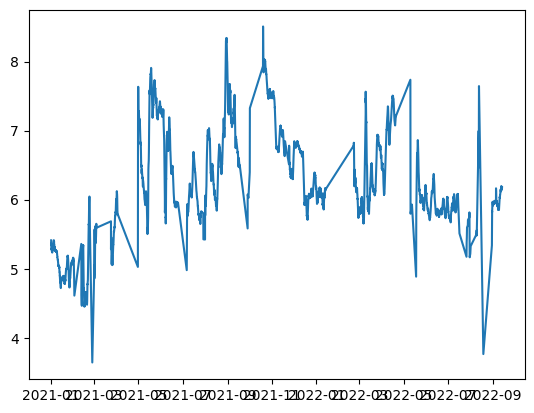

In [33]:
# df_test.index.unique().shape
plt.plot(df_test.rendement.sort_index().rolling('2D').mean())

In [34]:
trace1 = go.Scatter(
    x=df_test.index,
    y=df_test["rendement"],
    name='rendement',
    mode="markers",
    yaxis='y1'
)

trace2 = go.Scatter(
    x=df_test.rendement.sort_index().rolling("2D").mean().index,  # df_test.rendement.sort_index().rolling(100).mean().index,
    y=df_test.rendement.sort_index().rolling("2D").mean(),
    name='rolling average',
    yaxis='y1'
)
fig = make_subplots(specs=[[{"secondary_y": True}]])
fig.add_trace(trace1)
fig.add_trace(trace2,secondary_y=False)
fig.show()

### Génération de données théoriques

In [35]:
# Faire la fonction et ajouter comme paramètre le numéro du début, le numéro de fin, le nombre de valeur souhaitée, la décroissance souhaité, rajoutée une variable style if time, then précise le format

# Tester l'algorithme sur une seule décroissance sur l'année

# Test les algo pour 2 seuil dans l'année (soit avec 2 blocs de données)

# Test des algo avec 4 ou plusieurs blocs de données

# Test des algo avec la température extérieure

# Rajouter du bruit et vérifier que les algorithmes en sont invariant

# Créer sa propre classe de ML qui détecte un drift, à l'initialisation de la classe on lui précise la chute du rendement acceptable
# qui au moment du .fit, sans argument se base sur des données théoriques qu'on chargera dans le code,
# mais avec argument, le .fit se base sur un historique des données, puis le .predict ressort toutes les anomalies relevée et donne ses coordonnées. retourne un dictionnaire d'anomalies

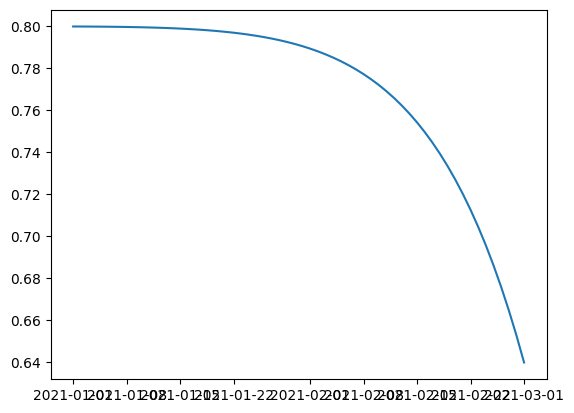

In [36]:
def drift_sample_generator(start_time,end_time,max_val,delta):
    '''
    Cette fonction permet de générer une suite de point présentant un drift.
    Le nombre de valeur étant déterminer par les dates de début et de fin
    
    start_time : date initiale
    end_time : date de fin
    max_val : valeur maximale initiale de la courbe. Valeur de reférence pour le drift
    delta : pourcentage de la décroissance
    nb_val : nombre de point

    le programme retourne un dataframe avec en index le temps, au format AAAA-MM-JJ et les valeurs de drift sur cette période

    Créer pour la suite une variante de cette fonction, qui rajoute du bruit sur les données
    drift_sample_generator(max_val,delta,nb_val,var_noise=0.01,noise="no")

    EXAMPLE
    df = drift_sample_generator(start_time = "01/2021",
                               end_time = "03/2021",
                               max_val=0.8,
                               delta=0.2)
    plt.plot(df)

    '''
    # définition de la valeur minimal atteinte sur la période précisée
    min_val = max_val*(1-delta) 

    # Création du dataframe avec les periodes passer en argument
    df = pd.DataFrame({"timestamp":[start_time, end_time],"rendement":[max_val,min_val]})
    df["timestamp"] = pd.to_datetime(df["timestamp"])
    df = df.set_index("timestamp")

    # Echantillonnage au jour
    df = df.resample("D").max()
    nb_val = df.resample("D").max().shape[0]
    
    x = np.linspace(1,100,num=nb_val)
    df["rendement"] = max_val - np.exp(np.sqrt(x))/np.exp(np.sqrt(x[-1]))*(max_val - min_val)
        
    return df
df_temp = drift_sample_generator(start_time = "01/2021",end_time = "03/2021",max_val=0.8,delta=0.2)
plt.plot(df_temp)

In [37]:
df_temp.head(5)

,rendement
timestamp,
2021-01-01,0.799980
2021-01-02,0.799963
2021-01-03,0.799941
2021-01-04,0.799915
2021-01-05,0.799883


In [38]:
fig = px.scatter(df_temp, x=df_temp.index, y=["rendement"], title="données théoriques")
fig.update_xaxes(range=["01/2021","05/2021"])
fig.update_yaxes(range=[0,1])
fig.show()

In [39]:
df_temp.head()

,rendement
timestamp,
2021-01-01,0.799980
2021-01-02,0.799963
2021-01-03,0.799941
2021-01-04,0.799915
2021-01-05,0.799883


In [40]:
df_temp2 = drift_sample_generator(start_time = "05/2021",end_time = "07/2021",max_val=0.5,delta=0.2)
df_temp2.head()

,rendement
timestamp,
2021-05-01,0.499988
2021-05-02,0.499977
2021-05-03,0.499964
2021-05-04,0.499949
2021-05-05,0.499930


In [41]:
fig1 = px.scatter(df_temp, x=df_temp.index, y=["rendement"], title="données théoriques")
fig2 = px.scatter(df_temp2, x=df_temp2.index, y=["rendement"], title="données théoriques")
fig.update_yaxes(range=[0,1])
fig.show()

In [42]:
trace1 = go.Scatter(
    x=df_temp.index,
    y=df_temp["rendement"],
    name='Drift 1',
    mode="markers",
    yaxis='y1'
)

trace2 = go.Scatter(
    x=df_temp2.index,
    y=df_temp2["rendement"],
    name='Drift 2',
    mode="markers",
    yaxis='y1'
)
fig = make_subplots(specs=[[{"secondary_y": True}]])
fig.add_trace(trace1)
fig.add_trace(trace2,secondary_y=False)
fig.show()

In [43]:
df_temp3 = pd.concat([df_temp,df_temp2])
df_temp3.shape

(122, 1)

On peut imaginer que le paramètre n_divsion serait issue du nombre total de saison dectecter à l'issue de l'algo ```saison_detection```

Le code ci-dessous permet de diviser le dataframe en en période annuelle idéale pour l'entrainement car on sait que le rendement dépendra de la période

In [44]:
def saison_detection(df,seuil_ecart=5,batch_size=10):

    saison_index = []
    arr_temp = []

    df = df.sort_index()

    for idx in range(1,df.index.shape[0]):
        if idx == 1:
            arr_temp.append(df.index[idx-1])
        ecart = (df.index[idx] - df.index[idx-1]).days
        if ecart < seuil_ecart:
            arr_temp.append(df.index[idx])
        else:
            if len(arr_temp) >= batch_size:      
                saison_index.append(arr_temp)
            arr_temp = []
            arr_temp.append(df.index[idx])
    # Bien coder cette partie
    # Penser à faire un filtre par exple sur la différence entre les jours arr_temp[-1] - arr_temp[0] > n_days
    if len(arr_temp) >= batch_size:
        saison_index.append(arr_temp)
    
    return saison_index

In [45]:
list_index = saison_detection(df_temp3)
len(list_index)

2

In [46]:
trace1 = go.Scatter(
    x=df_temp.index,
    y=df_temp["rendement"],
    name='Drift 1',
    mode="markers",
    yaxis='y1'
)

trace2 = go.Scatter(
    x=df_temp2.index,
    y=df_temp2["rendement"],
    name='Drift 2',
    mode="markers",
    yaxis='y1'
)
fig = make_subplots(specs=[[{"secondary_y": True}]])
fig.add_trace(trace1)
fig.add_trace(trace2,secondary_y=False)
for idx_plot in range(len(list_index)):
    fig.add_vrect(x0=list_index[idx_plot][0], x1=list_index[idx_plot][-1],fillcolor="green", opacity=0.15, line_width=0)
fig.show()

In [47]:
list_index = saison_detection(df_test,seuil_ecart=10,batch_size=25)
len(list_index)

8

In [48]:
trace1 = go.Scatter(
    x=df_test.index,
    y=df_test["rendement"],
    name='Drift 1',
    mode="markers",
    yaxis='y1'
)
fig = make_subplots(specs=[[{"secondary_y": True}]])
fig.add_trace(trace1)
for idx_plot in range(len(list_index)):
    fig.add_vrect(x0=list_index[idx_plot][0], x1=list_index[idx_plot][-1],fillcolor="green", opacity=0.15, line_width=0)
fig.show()

Avec cette étape on peut imaginer représenter uniquement les données saisonnières, y faire des statistiques, faire des aggrégations, etc.

Pour la suite, on se reconcentre sur le définition du l'algorithme de détection de drift sur des données théoriques

### Implémentation de notre propre Algo de Drift

Dans cette partie, nous créeons notre propre algorithme à base de règle simple. On fixe la valeur du drift qu'on veut détecter, et

Donner en entrer un df avec en index le temps et au moins 1 colonne nommée rendement.

On va diviser l'année en ```n_period``` et on va supposer que l'origine de la data est sur chacune des périodes. n_period est donc un hyper paramètre de notre modèle. Conseiller de prendre des qui match bien avec les mois de l'année

Penser à intégrer la loss pour le fit.

In [219]:
class veolia_drift():

    def __init__(self):
        return
        
    def fit(self,df,saison_gap=5,min_saison_size=10):
        self.df = df
        self.saison_gap = saison_gap
        self.min_saison_size = min_saison_size
        self.saison = saison_detection(self.df,self.saison_gap,self.min_saison_size)
        self.df_train = self.format_df(self.df,self.saison)
        return self.df_train
    
    def predict(self,df,delta,saison_gap=5,min_saison_size=10):
        
        self.delta = delta
        self.df_test = self.fit(df,saison_gap,min_saison_size)

        print("{:} saisons détectées sur les données à prédire".format(self.df_test.shape[0]))
        col_to_drop = ["rendement_final","decrement","saison"]
        columns_train=["debut_saison_train","fin_saison_train","rendement_initial_train"]
        temp_df = pd.DataFrame()
        
        for idx in range(self.df_test.shape[0]):
            min_c = (abs(self.df_test.debut_saison[idx] - self.df_train.debut_saison)).argmin() # On identifie par rapport au train df, la saison la plus proche en terme de jours
            temp_df = pd.concat([temp_df,pd.DataFrame(self.df_train.loc[min_c]).T],ignore_index=True)
        
        temp_df = temp_df.drop(columns=col_to_drop)
        temp_df.columns = columns_train

        self.df_predict = pd.concat([self.df_test,temp_df],axis=1)
        y = (self.df_predict.rendement_initial_train - self.df_predict.rendement_final)/self.df_predict.rendement_initial_train
        y = y.apply(lambda x : int(x > self.delta))
        self.df_predict["Classe_drift"] = y
        return self.df_predict

    def format_df(self,df,saison):
        temp = []
        for idx in range(len(saison)):
            df_saison = df.loc[saison[idx]].sort_index()
            debut_saison = df_saison.index[0]
            fin_saison = df_saison.index[-1]
            rendement_initial = df_saison.rendement[0]
            rendement_final = df_saison.rendement[-1]
            decrement = abs(rendement_initial-rendement_final)/rendement_initial
            temp.append((debut_saison,fin_saison,rendement_initial,rendement_final,decrement,idx+1))
        return pd.DataFrame(temp, columns=["debut_saison","fin_saison","rendement_initial","rendement_final","decrement","saison"])


On réussit donc avec cette classe à prédire un drift, sur des données saisonnières. La prochaine version de ce classifier consiterait à pouvoir intégré la température extérieur dans l'entrainement et la prediction.

Pour une version 2 de cette classe, prévoir le cas où il n'y a pas de .fit, que l'algorithme puis prédire un drift sur un période.

Autre idée, dans le cas où on ne fait peu créer des données théorique pour l'entrainement.

Rajouter aussi une condition de drift cad, si drift dans les données de prediction ou si drift par rapport aux données d'entrainement

In [221]:
clf = veolia_drift()
df_train = clf.fit(df_temp3)
display(df_train)
df_test = clf.predict(df_temp3,delta=0.3,saison_gap=5,min_saison_size=10)
df_test

,debut_saison,fin_saison,rendement_initial,rendement_final,decrement,saison
0,2021-01-01,2021-03-01,0.799980,0.64,0.19998,1
1,2021-05-01,2021-07-01,0.499988,0.40,0.19998,2


2 saisons détectées sur les données à prédire


,debut_saison,fin_saison,rendement_initial,rendement_final,decrement,saison,debut_saison_train,fin_saison_train,rendement_initial_train,Classe_drift
0,2021-01-01,2021-03-01,0.799980,0.64,0.19998,1,2021-01-01,2021-03-01,0.79998,0
1,2021-05-01,2021-07-01,0.499988,0.40,0.19998,2,2021-05-01,2021-07-01,0.499988,0


In [ ]:
n_division = 4
ii = 0
pas = 12//n_division
vect = []
vect.append(0)
if n_division == 5:
    n_division = 6
    print("Division de l'année par 5 impossible; L'année sera divisée en 6")
if n_division > 6:
    n_division = 12
    print("Division de l'année par {:} impossible; L'année sera divisée en 12".format(n_division))
for ii in range(n_division):
    vect.append((ii+1)*pas)
vect = np.array(vect)
vect

array([ 0,  3,  6,  9, 12])

Comment gérer le problème sur 2 années (a la fois pour le .fit et le .predict)?

envisager un découpage par mois et évaluer l'évolution sur chaque mois ?

Lors du calcul de la proximité, s'affranchier des années mais utilisé uniquement les MM-DD - SOLUTION : Faire un cacul en utilisant le modulo

In [236]:
# Sans le modulo
(pd.Timestamp(year=2018, month=1, day=10, hour=12) - pd.Timestamp(year=2017, month=1, day=1, hour=12)).days

374

In [237]:
# Avec modulo. Le résultat est totalement satisfaisant, nous l'implémentons dans l'algo
(pd.Timestamp(year=2018, month=1, day=10, hour=12) - pd.Timestamp(year=2017, month=1, day=1, hour=12)).days % 365

9

Avec cette implémentation, on voit que même si on donne en entrainement des données sur des années, l'algorihtme va extraire toutes les saisons de l'entrainement par année, et enfin, pour la prédiction, il va prédire les saisons observées par rapport au saisons les plus proches (indépendamment de l'année).